In [1]:
# Files
import os
from astropy.io import fits

# Astropy stuff
from astropy.wcs import WCS

# Math
import numpy as np

# Plotting
from zscale import zscale # Zscale
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

In [2]:
pluto_1_fname = os.path.join("data-2019-09-22-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_1_no_foo.fits")
pluto_2_fname = os.path.join("data-2019-09-23-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_2_no_foo.fits")

In [3]:
pluto_1_img    = fits.getdata(pluto_1_fname)
pluto_1_header = fits.getheader(pluto_1_fname)

pluto_2_img    = fits.getdata(pluto_2_fname)
pluto_2_header = fits.getheader(pluto_2_fname)

In [4]:
def bad_cols(img):
    img[:, 256] = np.nanmedian(img) # Bad column
    img = img[:, :1025] # Overscan region
    return img

pluto_1_img = bad_cols(pluto_1_img)
pluto_2_img = bad_cols(pluto_2_img)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


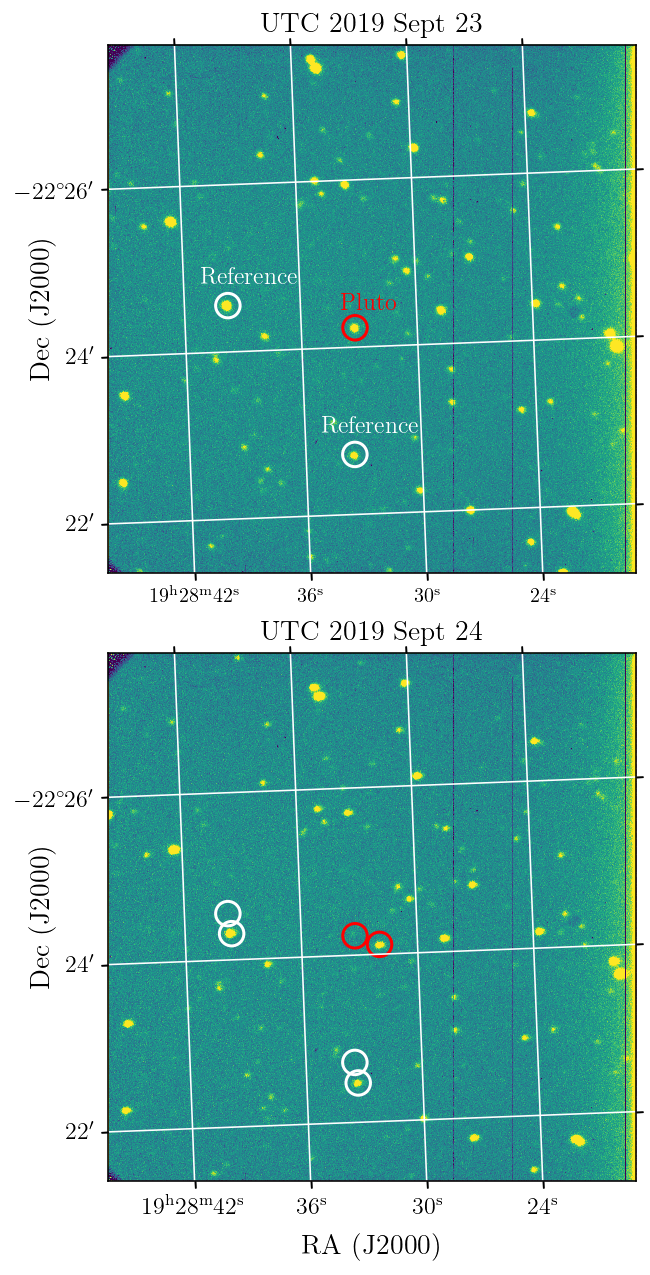

In [5]:
wcs_1 = WCS(pluto_1_header)

fig, axes = plt.subplots(nrows=2, figsize=(5, 9), sharex=True, sharey=True, subplot_kw={'projection':wcs_1})
axes[0].set_aspect('equal', share=True)
[ax.grid(color='white', ls='solid', alpha=1.0) for ax in axes]

# Night 1
vmin, vmax = zscale(pluto_1_img)
axes[0].imshow(pluto_1_img, interpolation = 'nearest', vmin=vmin, vmax=vmax, origin='lower')
mksize = 150
axes[0].scatter(478.8, 474.4, s=mksize, facecolors='none', edgecolors='r', lw=1.5) # Pluto night 1 
axes[0].text(451, 510, 'Pluto', fontsize=12, color='r')
axes[0].scatter(232.2, 517.4, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 1 night 1
axes[0].text(180, 560, 'Reference', fontsize=12, color='w')
axes[0].scatter(478.5, 228.8, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 2 night 1
axes[0].text(415.0, 270., 'Reference', fontsize=12, color='w')


# Night 2
vmin, vmax = zscale(pluto_2_img)
axes[1].imshow(pluto_2_img, interpolation = 'nearest', vmin=vmin, vmax=vmax, origin='lower')
axes[1].scatter(478.8, 474.4, s=mksize, facecolors='none', edgecolors='r', lw=1.5) # Pluto night 1
axes[1].scatter(526.4, 457.7, s=mksize, facecolors='none', edgecolors='r', lw=1.5) # Pluto night 2
axes[1].scatter(232.2, 517.4, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 1 night 1
axes[1].scatter(239.5, 478.5, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 1 night 2
axes[1].scatter(478.5, 228.8, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 2 night 1
axes[1].scatter(485, 189.0, s=mksize, facecolors='none', edgecolors='w', lw=1.5) # Ref star 2 night 2

# Axis labels
axes[0].set_ylabel('Dec (J2000)', fontsize=14, labelpad=-1)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].set_ylabel('Dec (J2000)', fontsize=14, labelpad=-1)
axes[1].set_xlabel('RA (J2000)', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# Subplot titles
axes[0].set_title('UTC 2019 Sept 23', fontsize=14)
axes[1].set_title('UTC 2019 Sept 24', fontsize=14)

plt.subplots_adjust(hspace=0.2)
fig.tight_layout(rect=[0, 0.0, 1, 1], pad=4)
fig.savefig('pluto_comparison.png', dpi=400)

plt.show()

In [60]:
n1 = np.array([232.2, 517.4])
n2 = np.array([239.5, 478.5])

nd = n2 - n1
nd_mag = np.sqrt(np.dot(nd, nd))
ps = 0.184 # arcsec/pixel
print("Pointing error = {:.4f} arcseconds".format(ps*nd_mag)) 

Pointing error = 7.2825 arcseconds
